# <span style="color: blue;">Model creation using Google Bert</span>
#### <span style="color: gray;"> Reference - Below link was taken as a reference to come up with the working model for tweet data.</span>
##### https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/

In [27]:
from IPython.display import HTML
HTML('''<script>
    code_show_err=false; 
    function code_toggle_err() {
     if (code_show_err){
     $('div.output_stderr').hide();
     } else {
     $('div.output_stderr').show();
     }
     code_show_err = !code_show_err
    } 
    $( document ).ready(code_toggle_err);
    </script>
    To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [28]:
import spacy
import en_core_web_sm
import pandas as pd
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk   

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics  import accuracy_score, roc_auc_score
from sklearn.base import TransformerMixin
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from ipynb.fs.full.function import lemm_data
from ipynb.fs.full.function import bar_plot
from ipynb.fs.full.function import get_live_tweets

In [30]:
pd.set_option('display.max_colwidth', None)

In [31]:
nlp = spacy.load('en_core_web_sm')
def spacy_tokenizer(doc): return [x.orth_ for x in nlp(doc)]

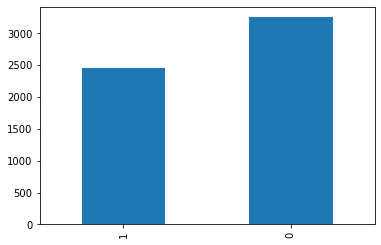

In [32]:
X_train,X_test,y_train,y_test=lemm_data()
bar_plot(y_train)

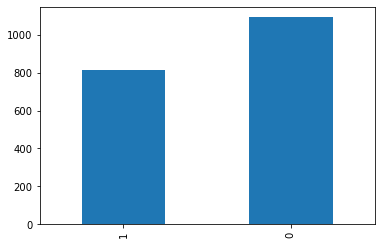

In [33]:
bar_plot(y_test)

In [34]:
stopwords = list(STOP_WORDS)

In [35]:
# for word in stopwords:
#     if word.is_stop == False and not word.is_punct:

In [36]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [37]:
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
classifier = LinearSVC()
tfvectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [38]:
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])


In [39]:
pipe.fit(X_train,y_train)

/Users/achandrasekhar/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7fb6e83e50d0>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7fb6b8a180d0>)),
                ('classifier', LinearSVC())])

In [40]:
print("Accuracy: ",pipe.score(X_train,y_train))

Accuracy:  0.9975477316517779


In [41]:
print("Accuracy: ",pipe.score(X_test,y_test))

Accuracy:  0.7836134453781513


In [42]:
pred_sentences = ['There''s an explosion happening now in the building across the street',
                  'Whats up man? You are the coolest person in the block!!!!']
for sentence in pred_sentences:
    print(sentence)
    preds = pipe.predict(sentence)
    print(preds)

Theres an explosion happening now in the building across the street
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Whats up man? You are the coolest person in the block!!!!
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [43]:
tweets = pd.read_csv('data/train.csv')
tweet=tweets[['text','target']]

In [44]:
df=tweets[tweets['target']==1]
print(len(df))
df1=tweets[tweets['target']==0]
frames = [df.iloc[:3271],df1.iloc[:3271]]
data = pd.concat(frames)
data

3271


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
...,...,...,...,...,...
5656,8068,rescue,NaN,Coastal German Shepherd Rescue OC shared a link: 'Ecstatic Rescued Racco... http://t.co/t8Q6DzVgwX #animalrescue,0
5657,8069,rescue,NaN,Suggs &amp; Vivian to the rescue! #psychrewatch,0
5658,8070,rescue,"Surry Hills, Sydney",Any lengths to rescue a cat in need! http://t.co/AMroX4Y4Nx,0
5659,8071,rescue,Sand springs oklahoma,Last Chance Animal Rescue has 3 new posts. http://t.co/f1tcbg1MKi #animalrescue | https://t.co/Is2iDC3UBJ,0


In [45]:
X1_train,X1_test,y1_train,y1_test = train_test_split(data.text,data.target,test_size=0.3,random_state=42)

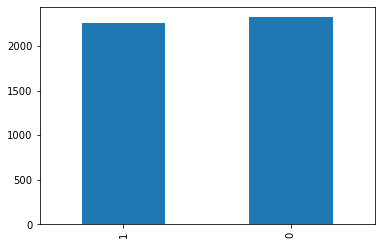

In [46]:
bar_plot(y1_train)

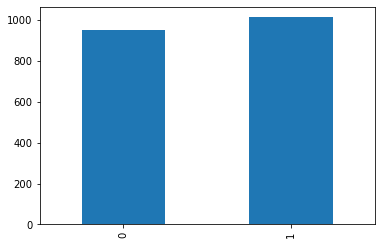

In [47]:
bar_plot(y1_test)

In [48]:
pipe.fit(X1_train,y1_train)

/Users/achandrasekhar/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7fb6e83e50d0>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7fb6b8a180d0>)),
                ('classifier', LinearSVC())])

In [49]:
print("Accuracy: ",pipe.score(X1_train,y1_train))

Accuracy:  0.9965057872898012


In [50]:
print("Accuracy: ",pipe.score(X1_test,y1_test))

Accuracy:  0.7896077432501274


In [51]:
pred_sentences = ['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
                  'Last Chance Animal Rescue has 3 new posts. http://t.co/f1tcbg1MKi #animalrescue | https://t.co/Is2iDC3UBJ']
for sentence in pred_sentences:
    print(sentence)
    preds = pipe.predict(sentence)
    print(preds)

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Last Chance Animal Rescue has 3 new posts. http://t.co/f1tcbg1MKi #animalrescue | https://t.co/Is2iDC3UBJ
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [52]:
live_tweets=get_live_tweets()
live_tweets['pred']=pipe.predict(live_tweets['tweets'])
live_tweets

,tweets,pred
0,RT @DailyLoud: Woman in wheelchair lost her mind and tried stabbing people. Luckily one man stepped up with the fire extinguisher 🧯 https:…,1
1,RT @minaqueenu: #877 Edelgard (Fire Emblem Three Hopes) swimsuit version ❤️ https://t.co/BpjARkZc1w,0
2,"@storygal87 @TopCat092761 @Alicenufc9 @cheerellas Of course there are, the aren't clones of each other!! \n\nThey both have different paths in life, but for now they are together as a family at a sad &amp; difficult time for them both. \n\nPerpetuating this feud in the media does nothing but fuel the fire of hatred &amp; is disrespectful.",1
3,@LonelyGoomba Time to read the dumpster fire that is the replies and proceed to lose braincells as each fan base clash off to try and prove their game is different with each iteration.\n\nHas it not once occurred to anyone that the reason the games are similar is because they are a franchise?,0
4,"@GriffinWB I think the responses are perfectly warranted. Destiny 2 is an unbalanced dumpster fire because Bungie just won't stop letting streamers or big personalities speak for the larger player base. I'm fine with Divinity as it is, its a fun support exotic to have for boss dps.",1
5,"@adam_wola @CBPWestTexas Fire them, and fully strip them of authority. Stephen Miller is an Orc in suit and tie. That's on them.",1
6,"Biene means bee or you can use honigbiene which means honey bee\nIn the german language valling someone bee is looked at as a sure fire to draw someone to you ""like a bee to a flower""\nI JUST LIKE THE THOUGHT OF ZEE CALLING NHU A HONEY BEE",0
7,RT @HotshotWake: Idaho: Burn Ops on the Moose Fire. Shoutout Snake River Hotshots. #moosefire #idaho #wildfire https://t.co/KIgxpQODbo,1
8,Operation Sky Fire happened 21 years ago😭😭 https://t.co/9OaX4ga0Oi,0
9,RT @Baby_DragonsNFT: I hope your weekend is on fire! 🔥🐲\n\nCongratulations to our Discord members that are getting on the whitelist tonight!…,0
